In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 读取数据

In [2]:
TRAIN_PATH = './data/train_dataset/'
TEST_PATH = './data/test_dataset/'

df_train = pd.read_csv(TRAIN_PATH+'nCoV_100k_train.labled.csv',engine ='python')
df_test = pd.read_csv(TEST_PATH+'nCov_10k_test.csv',engine ='python')

In [3]:
df_train.head()

,微博id,微博发布时间,发布人账号,微博中文内容,微博图片,微博视频,情感倾向
0,4456072029125500,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456074167480980,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456054253264520,01月01日 22:39,小王爷学辩论o_O,�偳癯空饩褪俏业�，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456061509126470,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455979322528190,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1


In [4]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
微博id      100000 non-null int64
微博发布时间    100000 non-null object
发布人账号     100000 non-null object
微博中文内容    99646 non-null object
微博图片      100000 non-null object
微博视频      100000 non-null object
情感倾向      99919 non-null object
dtypes: int64(1), object(6)
memory usage: 75.0 MB


In [5]:
df_train['情感倾向'].value_counts()

0     57619
1     25392
-1    16902
·         1
-2        1
9         1
-         1
10        1
4         1
Name: 情感倾向, dtype: int64

# 数据清洗

In [6]:
df_train = df_train[df_train['情感倾向'].isin(['-1','0','1'])]

In [7]:
df_train['情感倾向'] = df_train['情感倾向'].astype(np.int32)

In [8]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99913 entries, 0 to 99999
Data columns (total 7 columns):
微博id      99913 non-null int64
微博发布时间    99913 non-null object
发布人账号     99913 non-null object
微博中文内容    99560 non-null object
微博图片      99913 non-null object
微博视频      99913 non-null object
情感倾向      99913 non-null int32
dtypes: int32(1), int64(1), object(5)
memory usage: 70.2 MB


In [9]:
df_train.head()

,微博id,微博发布时间,发布人账号,微博中文内容,微博图片,微博视频,情感倾向
0,4456072029125500,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456074167480980,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456054253264520,01月01日 22:39,小王爷学辩论o_O,�偳癯空饩褪俏业�，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456061509126470,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455979322528190,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1


# 标签分布探索

## 标签总体分布

In [10]:
df_train['情感倾向'].value_counts()/df_train['情感倾向'].count()

 0    0.576692
 1    0.254141
-1    0.169167
Name: 情感倾向, dtype: float64

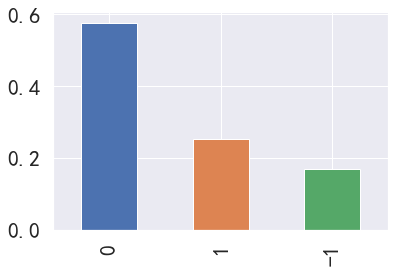

In [11]:
(df_train['情感倾向'].value_counts()/df_train['情感倾向'].count()).plot.bar()

## 时间对于标签分布的影响

In [12]:
df_train['time'] = pd.to_datetime('2020年' + df_train['微博发布时间'], format='%Y年%m月%d日 %H:%M', errors='ignore')

In [13]:
df_train['date'] = df_train['time'].dt.date

In [14]:
date_influence = df_train.groupby(['date','情感倾向'],as_index=False).count()

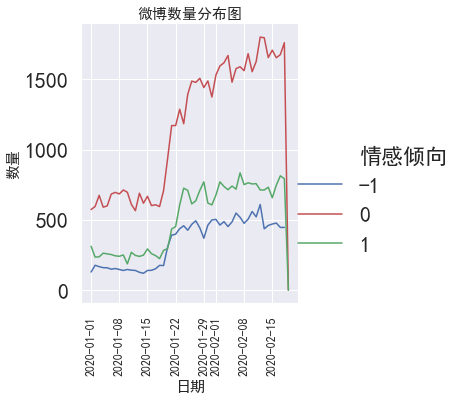

In [15]:

sns.relplot(x="date", y="微博id", kind="line", hue='情感倾向',palette=["b", "r",'g'],data=date_influence)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('日期',fontsize=15)
plt.ylabel('数量',fontsize=15)
plt.title('微博数量分布图',fontsize=15)
plt.show()

In [16]:
date_influence = date_influence.merge(df_train.groupby('date',as_index=False)['情感倾向'].count().rename(columns={'情感倾向':'weibo_count'}),how='left',on='date')

In [17]:
date_influence['weibo_rate'] = date_influence['微博id']/date_influence['weibo_count']

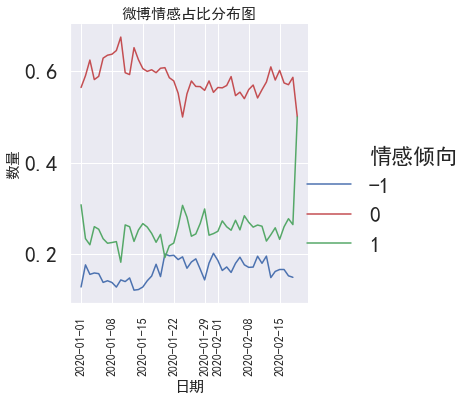

In [18]:

sns.relplot(x="date", y="weibo_rate", kind="line", hue='情感倾向',palette=["b", "r",'g'],data=date_influence)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('日期',fontsize=15)
plt.ylabel('数量',fontsize=15)
plt.title('微博情感占比分布图',fontsize=15)
plt.show()

# 微博文本数据

## 微博文本长度分析
- 基于字的长度
- 基于词的长度

In [19]:
df_train['char_length'] = df_train['微博中文内容'].astype(str).apply(len)

In [20]:
np.percentile(df_train['char_length'].tolist(),75)

140.0

In [21]:
np.percentile(df_train['char_length'].tolist(),99)

162.0

In [22]:
#北大开源的分词包
#如果安装包的时候网速较慢的话可以如下安装：
#pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pkuseg
import pkuseg
seg = pkuseg.pkuseg() 
text = seg.cut('我爱北京天安门')              # 进行分词
print(text)

['我', '爱', '北京', '天安门']


In [23]:
df_train['word_length'] = df_train['微博中文内容'].astype(str).apply(lambda x: len(seg.cut(x)))

In [24]:
np.percentile(df_train['word_length'].tolist(),99)

100.0

## 微博图片长度分析

In [25]:
df_train['pic_len'] = df_train['微博图片'].apply(lambda x: len(eval(x)))

In [26]:
df_train['pic_len'].value_counts()

1    48888
0    32080
2     4577
3     4344
9     4171
4     2487
6     2001
5      795
7      300
8      270
Name: pic_len, dtype: int64

Text(0.5, 1.0, 'pic_len(target)')

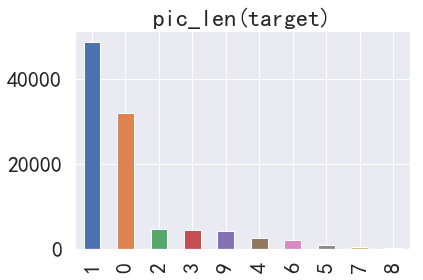

In [27]:
df_train['pic_len'].value_counts().plot.bar()
plt.title('pic_len(target)')

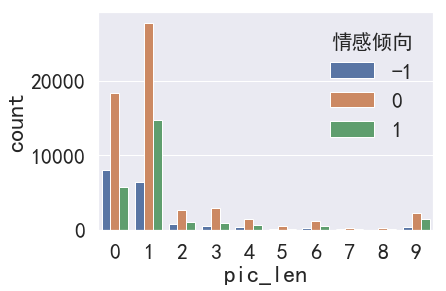

In [28]:
sns.countplot(x='pic_len', hue='情感倾向',data=df_train)
plt.show()

# 微博视频长度分析

In [29]:
df_train['video_len'] = df_train['微博视频'].apply(lambda x: len(eval(x)))

In [30]:
df_train['video_len'].value_counts()

0    77496
1    22417
Name: video_len, dtype: int64

Text(0.5, 1.0, 'video_len(target)')

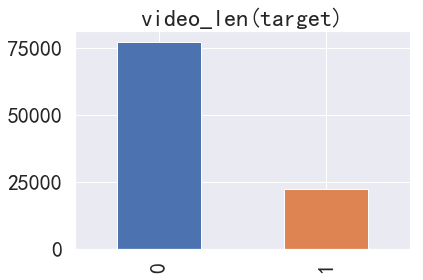

In [31]:
df_train['video_len'].value_counts().plot.bar()
plt.title('video_len(target)')